## A3b - Help Notebook

This notebook provides example outputs and suggestions for the exercises in *A3b: Filtering.* It does not include the solution code.

In [1]:
# activate the environment for this assignment
using Pkg
Pkg.activate(".")

using Plots
using Random

  Activating project at `~/Dropbox/teaching/CP/CP-notebooks/A3-Signal Processing`


In [2]:
# re-use code
include("../A1-Jupyter Notebooks/A1b-code.jl")
include("A3a-code.jl")

# import solution code
include("A3b-code.jl")

matched_filter_fig (generic function with 1 method)

### 1. Filtering

### 1a. Moving average IIR filter

This problem is asks for two mathematical derivations and then to describe the role of $\lambda$. You need to use the definition of the moving average function $y_M[n]$ to rewrite it in terms of itself, the current input $x[n]$, and a coefficient $\lambda$. To get started, write out the sum and then think about how you could separate out the $x[n]$. $\lambda$ will be a function of $M$.

### 1b. Implementation

Here are some example outputs using the `movingavg` and `randprocess` functions. Rerunning the cell should yield different random processes. Plotting note: here we're plotting the lines for `x` and `y` all at once and using vector options for `lw` (linewidth), `alpha` (transparency) to define the style for each line.

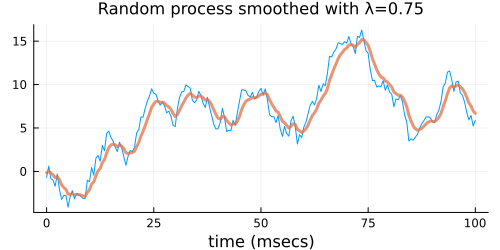

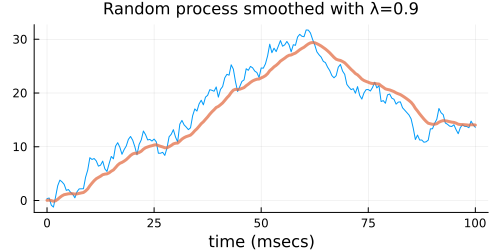

In [3]:
plotkw = (size=(500,250), legend=false, titlefontsize=11, xlabel="time (msecs)")

fs = 2000
t = 0:1/fs:0.1

for λ in [0.75, 0.9]
    x = randprocess(length(t); σ=1)
    y = movingavg(x; λ)
    fig = plot(10^3*t, [x y]; lw=[1 3], alpha=[1 0.75], plotkw...)
    title!("Random process smoothed with λ=$λ")
    display(fig)
end

The second part of the problem asks you to smooth a noisy sine wave using the `noisysignal` function you wrote in A3a.

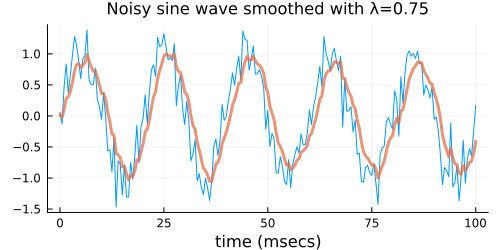

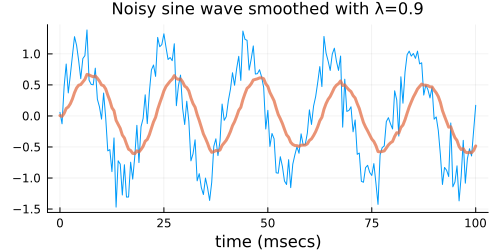

In [4]:
fs = 2000
t = 0 : 1/fs : 0.1

x = noisysignal.(t, t -> sinewave(t; f=50); τ=0.0, T=0.1, σ=0.25)

for λ in [0.75, 0.9]
    y = movingavg(x; λ)
    fig = plot(10^3*t, [x y]; lw=[1 3], alpha=[1 0.75], plotkw...)
    title!("Noisy sine wave smoothed with λ=$λ")
    display(fig)
end

### 1c. System delay

You can answer this intuitively, but it is possible to give a more quantitative answer by thinking about the relation between $\lambda$ and $M$ from Exercise 1a. This provides a simple way to (approximately) adjust the delay to center the output for sinewave plots above. The plots below show example outputs, but omits how to derive the values.

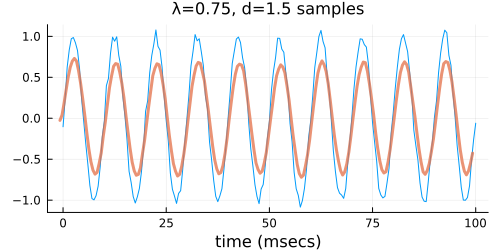

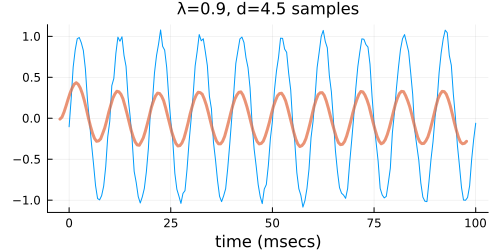

In [5]:
fs = 2000
t = 0 : 1/fs : 0.1

x = noisysignal.(t, t -> sinewave(t; f=100); τ=0.0, T=0.1, σ=0.05)

for (λ, d) in zip([0.75, 0.9], [1.5, 4.5])
    y = movingavg(x; λ)

    # plot the signal
    fig = plot(10^3*t, x; lw=1, plotkw...)

    # convert delay (which is in samples) to seconds
    τ = d/fs

    # plot the delay-corrected filter output
    plot!(10^3*(t .- τ), y; lw=3, alpha=0.75, plotkw...)

    title!("λ=$λ, d=$d samples")
    display(fig)
end

### 2. IIR Filters

### 2a. Implementation

The plots below shows that the `filterIIR` filter function reproduces the output of the `movingavg` filter.

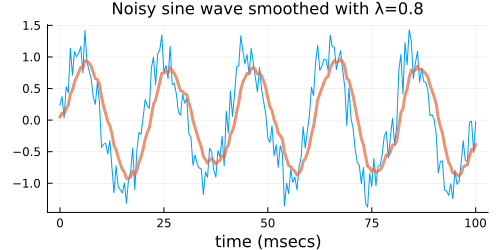

In [6]:
# First show the output using movingavg
fs = 2000
t = 0 : 1/fs : 0.1

x = noisysignal.(t, t -> sinewave(t; f=50); τ=0.0, T=0.1, σ=0.25)

λ = 0.8
yma = movingavg(x; λ)

fig = plot(10^3*t, [x yma]; lw=[1 3], alpha=[1 0.75], plotkw...)
title!("Noisy sine wave smoothed with λ=$λ")

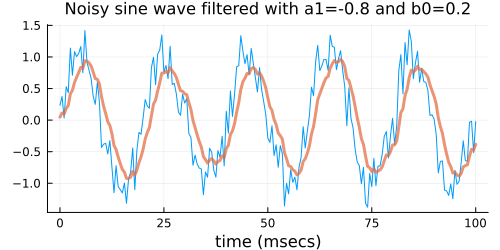

In [7]:
# Then contrast it with filterIIR

# Note a and b are vector arguments with one element each.
a = [-λ]
b = [1-λ]

yiir = filterIIR(x; a, b)

fig = plot(10^3*t, [x yma]; lw=[1 3], alpha=[1 0.75], plotkw...)

# By convention indexing of a starts with one and b starts with zero.
# title!("Noisy sine wave filtered with a1=$(a[1]) and b0=$b[1]")

b0 = round(b[1], digits=1) # workaround floating point precision
title!("Noisy sine wave filtered with a1=$(a[1]) and b0=$b0")


In [8]:
# Your two methods should be mathematically identical.
sum(yiir .- yma)

0.0

### 2b. First order low- and high-pass IIR filters

Here you apply your `filterIIR` using different coefficients to illustrate low- and high-pass filtering. Example outputs are shown below. To answer the last part of the question, you should contrast the two difference equations.

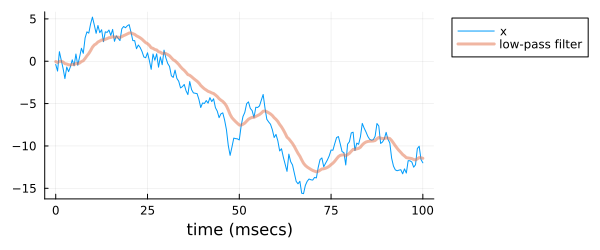

In [9]:
plotkw = (size=(600,250), legend=:outertopright, 
    titlefontsize=11, xlabel="time (msecs)", 
    bottom_margin=20Plots.px) # prevent x label from being cutoff

fs = 2000
t = 0 : 1/fs : 0.1

x = randprocess(length(t); σ=1)
y = filterIIR(x; a=[-0.9], b=[0.1])

fig = plot(10^3*t, x; label="x", plotkw...)
plot!(10^3*t, y; lw=3, alpha=0.5, label="low-pass filter", plotkw...)

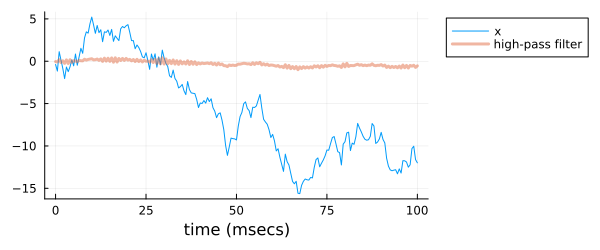

In [10]:
# use the same input signal x from the previous cell.
y = filterIIR(x; a=[0.9], b=[0.1])

fig = plot(10^3*t, x; label="x", plotkw...)
plot!(10^3*t, y; lw=3, alpha=0.5, label="high-pass filter", plotkw...)

### 2c. Second order bandpass filters

Like above, we can create a different filter using different coefficients. The examples are shown below. Again you should interpret the IIR difference equations to explain how they implement bandpass filters.

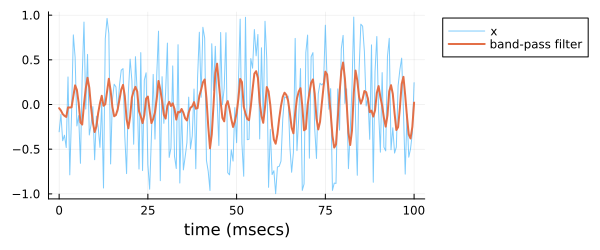

In [11]:
fs = 2000
t = 0 : 1/fs : 0.1

x = 2*rand(length(t)) .- 1

a = [-1.265, 0.81]
b = [0.135]

y = filterIIR(x; a, b)

fig = plot(10^3*t, x; alpha=0.5, label="x", plotkw...)
plot!(10^3*t, y; lw=2, label="band-pass filter", plotkw...)

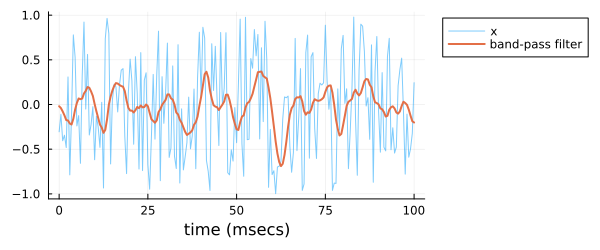

In [12]:
a = [-1.702, 0.81]
b = [0.063]

y = filterIIR(x; a, b)

fig = plot(10^3*t, x; alpha=0.5, label="x", plotkw...)
plot!(10^3*t, y; lw=2, label="band-pass filter", plotkw...)

### 2d. Characterizing the filter response

Below is example code to plot the matrix of responses as specified in the question. There are various ways to do this as well as different style choices, so view this as a starting point.

You need add in the code to generate the signals and compute the filtered results. You should also choose sets of values for the frequencies and noise levels that best illustrate how the responses vary. Your choices and plot should support your observations and interpretation of the results.

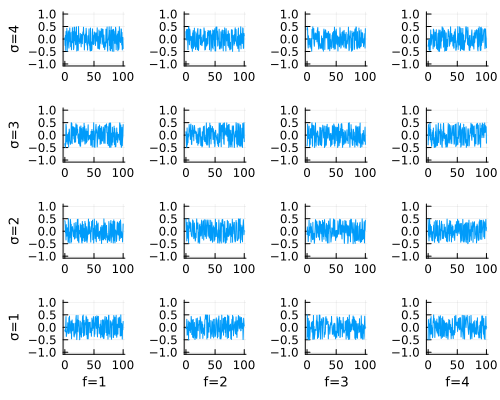

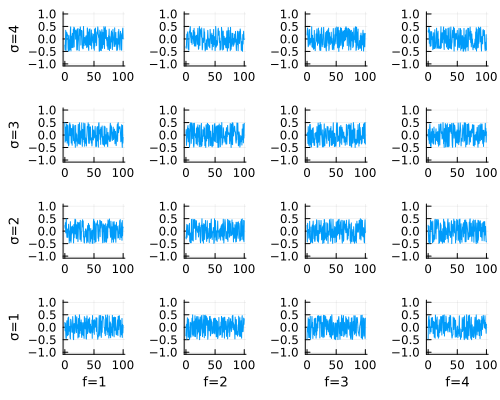

In [13]:
function noisefreqplot(; t, freqs, σs, a, b)
    plotkw = (size=(500, 400), legend=false, 
        xticks=range(10^3*t[1], 10^3*t[end], length=3),
        xguidefontsize=9, yguidefontsize=9)

    subfigs = []
    ymax = ymin = 0.0
    for (i, σ) in enumerate(σs), (j, f) in enumerate(freqs)
        x = rand(length(t)) .- 0.5
        y = x
        ymax = 1.05*max(ymax, maximum(y))
        ymin = 1.05*min(ymin, minimum(y))
        xlabel = (i == length(freqs) ? "f=$f" : "")
        ylabel = (j == 1 ? "σ=$σ" : "")
        push!(subfigs, plot(10^3*t, y; xlabel, ylabel, plotkw...))
    end

    ylim = (ymin, ymax)
    fig = plot(subfigs...; ylim, layout=grid(length(σs), length(freqs)))
    return fig
end

fs = 2000
t = 0 : 1/fs : 0.1

freqs = [1, 2, 3, 4]
σs = [4, 3, 2, 1]

# first set of filter coeffs from 2c
a = [-1.265, 0.81]
b = [0.135]

fig = noisefreqplot(; t, freqs, σs, a, b)
display(fig)

# second set of filter coefs from 2c
a = [-1.702, 0.81]
b = [0.063]

fig = noisefreqplot(; t, freqs, σs, a, b)
display(fig)

The last part of question 2d asks you to plot frequency response curves for the two sets of coefficients. This plots the output power as a function of input frequency, i.e. a sine wave without noise. Below is example code to make the plot. You need to add the code the compute the values. You should find to that the response peaks at different different frequencies and calculate and include those values in your description.

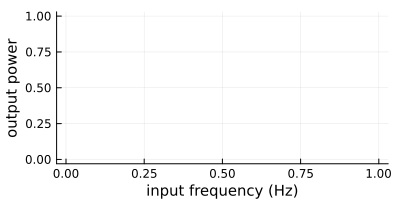

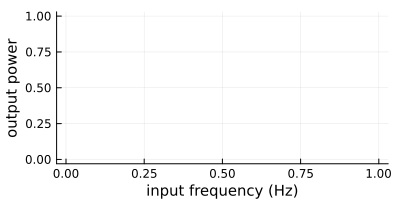

In [14]:
function plotfreqresp(t; fs, a, b, plotkw...)
    defaultkw = (size=(400, 200), legend=false,
        xlabel="input frequency (Hz)",
        ylabel="output power",
        xguidefontsize=10, yguidefontsize=10)

    powerout = []
    freqs = []

    fig = plot(freqs, powerout; defaultkw..., plotkw...)
    return fig
end

fs = 2000
t = 0 : 1/fs : 0.1

a = [-1.265, 0.81]
b = [0.135]

fig = plotfreqresp(t; fs, a, b)
display(fig)

a = [-1.702, 0.81]
b = [0.063]

fig = plotfreqresp(t; fs, a, b)
display(fig)

### 3. The impulse response function

### 3a. Deriving the impulse response function

If you're not sure how to approach this, re-read the discussion in section 3 and make sure you understand the concepts and equations for the system response, superposition, and time-invariance. Start with the reproducing formula. This isn't a complex derivation, because you have all the pieces in place, but you should be able to explain the meaning of $h[n]$ and why both assumptions of linearity and time-invariance are necessary to explain the system response to arbitrary inputs.

### 3b. Impulse responses

Here you need to specify the input as an impulse and use `filterIIR` to derive and plot the response for each of the filters used so far and provide an interpretation. The code below uses random noise just to get example outupts.

In [15]:
plotkw = (size=(400,200), legend=false, titlefontsize=11,
    line=:stem, marker=:circle, markersize=3, xlabel="time (msecs)")

fs = 2000

# Choose an appropriate length.
T = 0.010
t = 0 : 1/fs : T

# Define the appropriate input function to obtain the impulse response.
x = rand(length(t));

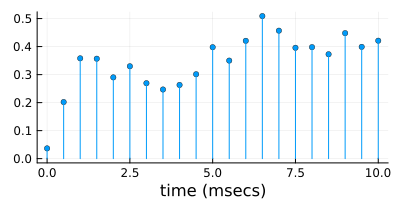

In [16]:
# moving average (low pass)
λ = 0.8
y = filterIIR(x; a=[-λ], b=[1-λ])

plot(10^3*t, y; label="h[n]", plotkw...)

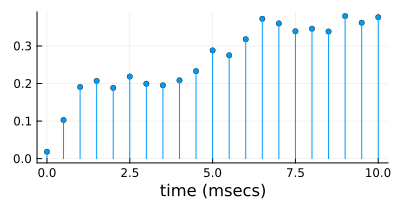

In [17]:
# low pass
y = filterIIR(x; a=[-0.9], b=[0.1])
plot(10^3*t, y; label="h[n]", plotkw...)

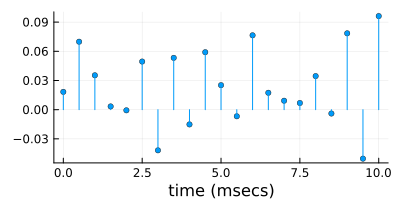

In [18]:
# high pass
y = filterIIR(x; a=[0.9], b=[0.1])
plot(10^3*t, y; label="h[n]", plotkw...)

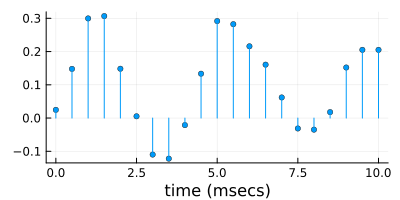

In [19]:
# bandpass 1
y = filterIIR(x; a=[-1.265, 0.81], b=[0.135])
plot(10^3*t, y; label="h[n]", plotkw...)

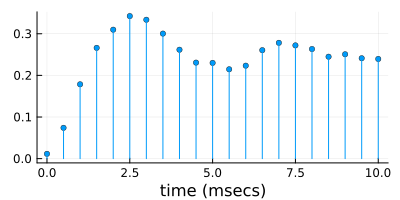

In [20]:
# bandpass 2
y = filterIIR(x; a=[-1.702, 0.81], b=[0.063])
plot(10^3*t, y; label="h[n]", plotkw...)

### 4. Filtering with convolution

While the convolution equation seems simple it is tricky to get exactly right. Be sure to read the sections on indexing and bounds before you write your implementation.

### 4a. Implementing convolution

We first show numerical outputs so we can compare to values directly. They should be the same. Again this code just uses a random impulse response function to get example outputs. You should put in the correct code.

In [21]:
plotkw = (size=(500, 250), legend=false, titlefontsize=11)

fs = 2000
t = 0 : 1/fs : 0.050

# Like above, define the appropriate input to obtain the impulse response function.
x = rand(length(t));

a = [-1.265, 0.81]
b = [0.135]

# use bandpass1 as an example
h = filterIIR(x; a, b)
x = 2*rand(length(t)) .- 1

yiir = filterIIR(x; a, b)

101-element Vector{Float64}:
 -0.09697260714310348
 -0.16471409509426535
 -0.06504782889002315
 -0.04530676762901295
 -0.008035094713784018
 -0.08762944630277758
 -0.09637669696984742
  0.022583188549588892
  0.10192941644022421
  0.23649206780073292
  ⋮
  0.03470440651095753
  0.04692194832138105
  0.09104474963919969
  0.19982287298351503
  0.13752923972781708
 -0.11987399385100367
 -0.320478463282057
 -0.24543762625258947
 -0.013747116806728576

In [22]:
yh = convolve(x, h)

101-element Vector{Float64}:
 -0.061585834334896186
 -0.18285671762833614
 -0.22702896701262082
 -0.25558666835680743
 -0.30365791164614503
 -0.30561379589641585
 -0.31170693638464786
 -0.25534979386785267
 -0.20476314316387165
 -0.19539815010667388
  ⋮
 -0.26718596229226405
 -0.04714676478767468
  0.39201188626671835
  0.24071537542794563
 -0.08381818818861451
 -0.24452045070983053
 -0.30401323005701
  0.06282112494439582
  0.5140455779986569

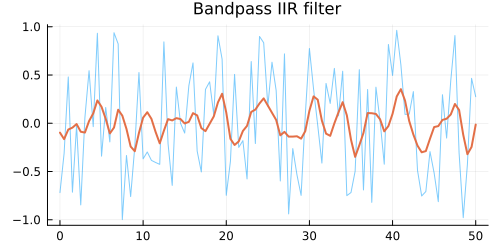

In [23]:
fig1 = plot(10^3*t, x; alpha=0.5, plotkw...)
plot!(10^3*t, yiir; lw=2, title="Bandpass IIR filter", plotkw...)

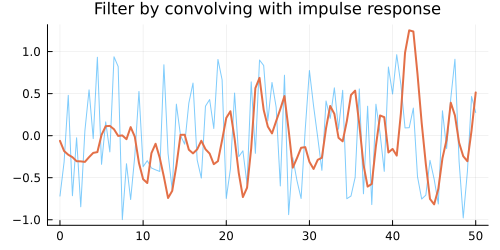

In [24]:
fig2 = plot(10^3*t, x; alpha=0.5, plotkw...)
plot!(10^3*t, yh; lw=2, title="Filter by convolving with impulse response", 
    plotkw...)

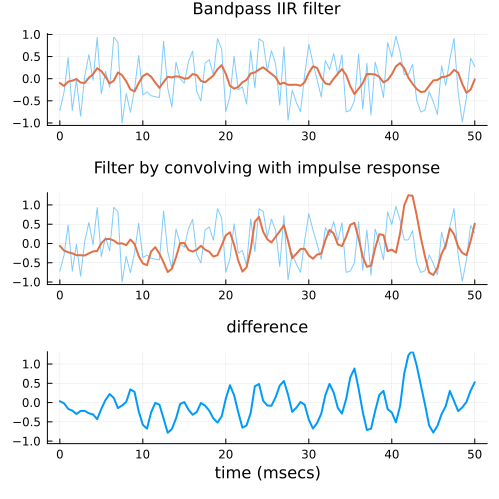

In [25]:
ylim = ylims(fig2)

fig3 = plot(10^3*t, yh - yiir; lw=2, ylim, 
    title="difference", xlabel="time (msecs)", plotkw...);

plot(fig1, fig2, fig3; layout=(3,1), legend=false, size=(500,500))

We can also show that they are identical within numerical imprecision.

In [26]:
sum(yh - yiir)

-5.795075999431168

### 4b. FIR filtering

This is similar to 4a except you onky use the first K values of the impulse response function. As K gets larger, it should converge to the results in 4a.

For part 2, you filter with a Gabor kernel and use the `i0` parameter to define the index of time zero. This will result in the filtering being centered around the sample. The output should look qualitatively similar to the results for the first bandpass filter, because the Gabor function has the same center frequency.

### 4c. Using matched filters to detect signals in noise

You plot below shows the type of elements you need and example outputs. In explaining the effectiveness of this approach vs threshould detection you should use different examples and parameters to make your points.

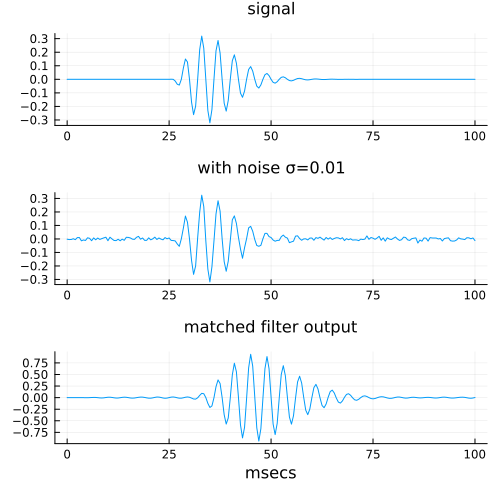

In [27]:
# sampling
fs = 2000
t = 0 : 1/fs : 0.100

# gammatone parameters
f = 250     # frequency
τ = 0.025   # signal delay

# noise level
σ=0.01

fig = matched_filter_fig(; fs, t, f, τ, σ)